In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
# Load data
data = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')

In [3]:
# Display the shape of the data
print(data.shape)
# (1433, 63) - 1433 rows and 63 columns

(1433, 63)


In [4]:
# Print columns
print(data.columns)

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

In [5]:
# Desribe data
print(data.describe(include='object'))

# Count occurances of each value in a column
for column in data.columns:
    print(data[column].value_counts())
    print("Empty:",data[column].isnull().sum())

       How many employees does your company or organization have?  \
count                                                1146           
unique                                                  6           
top                                                26-100           
freq                                                  292           

       Does your employer provide mental health benefits as part of healthcare coverage?  \
count                                                1146                                  
unique                                                  4                                  
top                                                   Yes                                  
freq                                                  531                                  

       Do you know the options for mental health care available under your employer-provided coverage?  \
count                                                1013                              

What country do you live in?
United States of America    840
Other                       194
United Kingdom              180
Canada                       78
Germany                      58
Netherlands                  48
Australia                    35
Name: count, dtype: int64


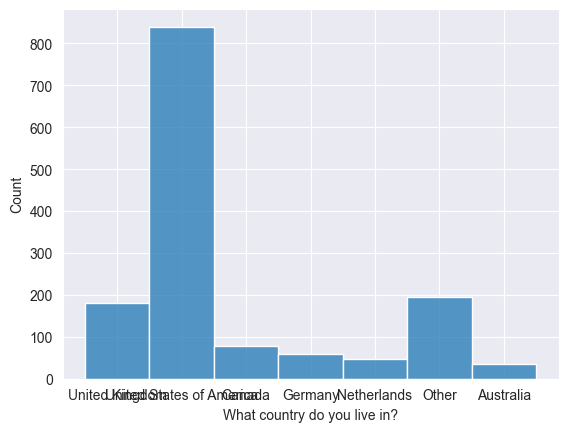

In [6]:

# Concatenate countries with less than 30 entries into 'Other'
data['What country do you live in?'] = data['What country do you live in?'].apply(lambda x: 'Other' if data['What country do you live in?'].value_counts()[x] < 30 else x)
print(data['What country do you live in?'].value_counts())
# Show the distribution of countries
sns.histplot(data['What country do you live in?'])
# drop country you work in
data.drop('What country do you work in?', axis=1, inplace=True)

34.074177746676


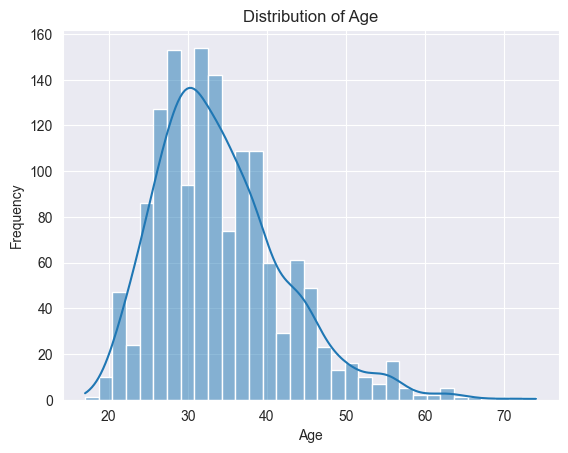

In [7]:
# Handle outliers of Age by replacing values with mean (age 99, 323 and 3)
# Calculate mean without outliers
age = data['What is your age?'].where(data['What is your age?'] < 90).where(data['What is your age?'] > 16)
mean_age = age.mean()
print(mean_age)
# Replace outliers with mean
data['What is your age?'] = data['What is your age?'].apply(lambda x: int(mean_age) if x > 90 or x < 16 else x)

#Display the new age distribution
sns.histplot(data['What is your age?'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<Axes: xlabel='Do you currently have a mental health disorder?', ylabel='Count'>

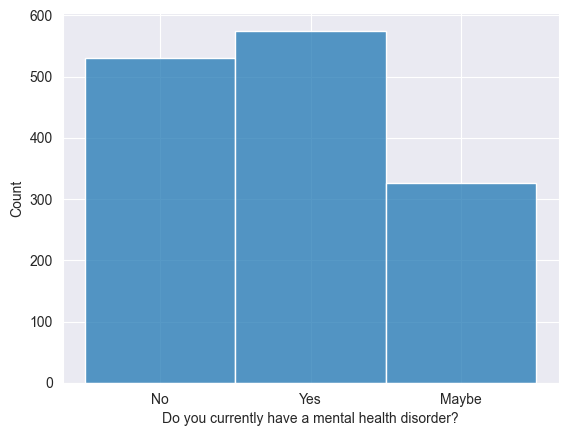

In [8]:
# Show distribution of mental health condition
sns.histplot(data['Do you currently have a mental health disorder?'])

In [9]:
# Show distribution of different conditions (#128 different answeres)
print(data['If yes, what condition(s) have you been diagnosed with?'].unique())

disorders = ["Anxiety Disorder", "Mood Disorder", "Substance Use Disorder", "Personality Disorder", "Stress Response Syndromes", "Attention Deficit Hyperactivity Disorder"]
# Create new colums for each disorder and set to 1 if the disorder is present
for disorder in disorders:
    data[disorder] = data['If yes, what condition(s) have you been diagnosed with?'].apply(lambda x: 1 if isinstance(x, str) and disorder in x else 0)
    
# Create other column that gets ticked if none of the above disorders are present, but some other disorder is
# check if field is not empty and none of the above disorders are present
data['Other'] = data['If yes, what condition(s) have you been diagnosed with?'].apply(lambda x: 1 if isinstance(x, str) and not any(disorder in x for disorder in disorders) else 0)

# check result and create graph
disorders = data[disorders + ['Other']].sum()



# drop old column
data.drop('If yes, what condition(s) have you been diagnosed with?', axis=1, inplace=True)




[nan
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)'
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Stress Response Syndromes'
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Stress Response Syndromes|Substance Use Disorder'
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Substance Use Disorder'
 'Mood Disorder (Depression, Bipolar Disorder, etc)'
 'Anxiety Disorder (Generalized, Social, Phobia, etc)'
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Obsessive-Compulsive Disorder'
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Eating Disorder (Anorexia, Bulimia, etc)|Obsessive-Compulsive Disorder'
 'Personality Disorder (Borderline, Antisocial, Paranoid, etc)|Attention Deficit Hyperactivity Disorder'
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Substance Use Disorder|Addictive Disorder'
 'Mood

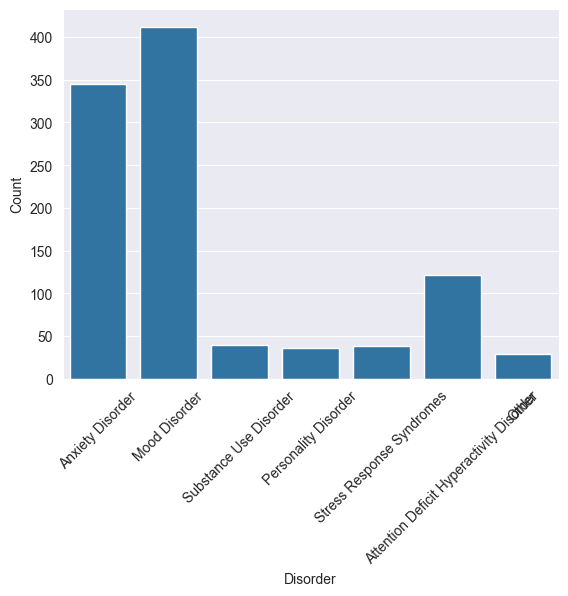

In [10]:
# Plot graph of mental health disorders
sns.barplot(x=disorders.index, y=disorders.values)
plt.xticks(rotation=45)
plt.xlabel('Disorder')
plt.ylabel('Count')
plt.show()

What is your gender?
Male           610
male           249
Female         153
female          95
M               86
              ... 
cis male         1
Human            1
Genderfluid      1
Enby             1
MALE             1
Name: count, Length: 70, dtype: int64
3
['Male' 'male' 'Male ' 'Female' 'M' 'female' 'm' 'I identify as female.'
 'female ' 'Bigender' 'non-binary' 'Female assigned at birth ' 'F' 'Woman'
 'man' 'fm' 'f' 'Cis female ' 'Transitioned, M2F'
 'Genderfluid (born female)' 'Other/Transfeminine'
 'Female or Multi-Gender Femme' 'Female ' 'woman' 'female/woman'
 'Cis male' 'Male.' 'Androgynous' 'male 9:1 female, roughly' nan
 'Male (cis)' 'Other' 'nb masculine' 'Cisgender Female' 'Man'
 'Sex is male' 'none of your business' 'genderqueer' 'cis male' 'Human'
 'Genderfluid' 'Enby' 'Malr' 'genderqueer woman' 'mtf' 'Queer' 'Agender'
 'Dude' 'Fluid'
 "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriousl

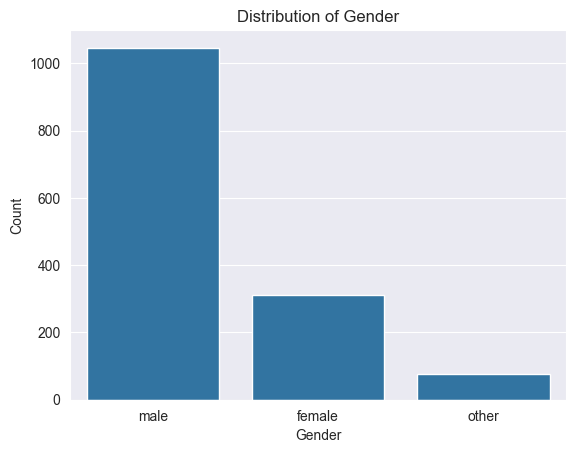

In [11]:
# Clean up gender
# Show distribution
print(data['What is your gender?'].value_counts())
# Show missing values
print(data['What is your gender?'].isnull().sum())
# 3 missing
# show unique values
print(data['What is your gender?'].unique())
# create list by differentiating male, female
male = ['Male', 'male','Male ', 'M', 'm', 'man','Cis male' 'Male.','Male (cis)','nb masculine','Man','Sex is male','cis male', 'Dude']
female = ['Female','female','I identify as female.','female ','Female assigned at birth ','F', 'Woman', 'fm', 'Cis female', 'Female ', 'woman', 'female/woman', 'Cisgender Female']
# Replace values

def map_gender(gender): # Remove leading/trailing whitespace
    if gender in male:
        return 'male'
    elif gender in female:
        return 'female'
    else:
        return 'other'

data['Gender'] = data['What is your gender?'].apply(map_gender)
print(data['Gender'].value_counts())
# drop old column
data.drop('What is your gender?', axis=1, inplace=True)

sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [12]:
# Drop columns with very high variability
# Which of the following best describes your work position?
# Why or why not?

data.drop(['Which of the following best describes your work position?', 'Why or why not?'], axis=1, inplace=True)

In [13]:
# Count the number of missing values in each column
print(data.isnull().sum())

# Show % of missing values in each column
print(data.isnull().mean().sort_values(ascending=False))

# show features with more than 50% missing values
over50 = data.columns[data.isnull().mean() > 0.5]
print(">50",over50)

# Show features with 30%-50% missing
less50 = data.columns[(data.isnull().mean() > 0.3) & (data.isnull().mean() < 0.5)]
print("30-50",less50)

# Show features with 10%-30% missing
less30 = data.columns[(data.isnull().mean() > 0.1) & (data.isnull().mean() < 0.3)]
print("10-30",less30)

# Show features with less than 10% missing
less10 = data.columns[data.isnull().mean() > 0 & (data.isnull().mean() < 0.1)]
print("<10",less10)


Are you self-employed?                                                                  0
How many employees does your company or organization have?                            287
Is your employer primarily a tech company/organization?                               287
Is your primary role within your company related to tech/IT?                         1170
Does your employer provide mental health benefits as part of healthcare coverage?     287
                                                                                     ... 
Personality Disorder                                                                    0
Stress Response Syndromes                                                               0
Attention Deficit Hyperactivity Disorder                                                0
Other                                                                                   0
Gender                                                                                  0
Length: 66

In [14]:
# In general colums with more than 50% missing values should be dropped
for column in over50:
    data.drop(column, axis=1, inplace=True)


In [15]:
# Handle 30-50% missing values
data.drop(less50, axis=1, inplace=True)

In [16]:
# Handle 10-30% missing values
# Get uniques of columns
for column in less30:
    #print(column, data[column].describe())
    #print(data[column].unique())
    print(column, data[column].value_counts())

How many employees does your company or organization have? How many employees does your company or organization have?
26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: count, dtype: int64
Is your employer primarily a tech company/organization? Is your employer primarily a tech company/organization?
1.0    883
0.0    263
Name: count, dtype: int64
Does your employer provide mental health benefits as part of healthcare coverage? Does your employer provide mental health benefits as part of healthcare coverage?
Yes                                531
I don't know                       319
No                                 213
Not eligible for coverage / N/A     83
Name: count, dtype: int64
Do you know the options for mental health care available under your employer-provided coverage? Do you know the options for mental health care available under your employer-provided coverage?
No               354
I am 

In [17]:
# Fill missing values with "I dont know" where option exists
i_dont_know = ["Does your employer provide mental health benefits as part of healthcare coverage?",
               "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",
            "Does your employer offer resources to learn more about mental health concerns and options for seeking help?",
            "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?",
            "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",
            "Do you feel that your employer takes mental health as seriously as physical health?",
               "Have your previous employers provided mental health benefits?",
               "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?",
            "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?",
            "Do you think that discussing a mental health disorder with previous employers would have negative consequences?",
            "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?",
             "Did you feel that your previous employers took mental health as seriously as physical health?"
               ]

for column in i_dont_know:
    data[column].fillna("I don't know", inplace=True)

C:\Users\vince\AppData\Local\Temp\ipykernel_5860\3804963523.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna("I don't know", inplace=True)


In [18]:
# Columns where mode imputation is used
mode_impute = ["How many employees does your company or organization have?",
               "Is your employer primarily a tech company/organization?",
               "Do you think that discussing a mental health disorder with your employer would have negative consequences?",
               "Do you think that discussing a physical health issue with your employer would have negative consequences?",
               "Would you feel comfortable discussing a mental health disorder with your coworkers?",
               "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?",
               "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?",
               "Were you aware of the options for mental health care provided by your previous employers?",
               "Did your previous employers provide resources to learn more about mental health issues and how to seek help?",
               "Do you think that discussing a physical health issue with previous employers would have negative consequences?",
               "Would you have been willing to discuss a mental health issue with your previous co-workers?",
               "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?",
               ]
for column in mode_impute:
    data[column].fillna(data[column].mode()[0], inplace=True)

C:\Users\vince\AppData\Local\Temp\ipykernel_5860\899951525.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [19]:
# other
# I am not sure
not_sure = ["Do you know the options for mental health care available under your employer-provided coverage?"]

for column in not_sure:
    data[column].fillna('I am not sure', inplace=True)

C:\Users\vince\AppData\Local\Temp\ipykernel_5860\3964742752.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna('I am not sure', inplace=True)


In [20]:
# Columns to drop because of very high variability
drop =["Why or why not?.1"] # 1080 different entries
data.drop(drop, axis=1, inplace=True)

In [21]:
# Handle columns with less than 10% missing
    
# Fill missing value with I am not sure if possible
data['Do you know the options for mental health care available under your employer-provided coverage?'].fillna('I am not sure', inplace=True)

data["Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"].fillna("Maybe/Not sure", inplace=True)


C:\Users\vince\AppData\Local\Temp\ipykernel_5860\2030221911.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Do you know the options for mental health care available under your employer-provided coverage?'].fillna('I am not sure', inplace=True)
C:\Users\vince\AppData\Local\Temp\ipykernel_5860\2030221911.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becaus

In [22]:
for column in data.columns:
    print(data[column].value_counts())

# Save cleaned data
data.to_csv('cleaned_data.csv', index=False)

Are you self-employed?
0    1146
1     287
Name: count, dtype: int64
How many employees does your company or organization have?
26-100            579
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: count, dtype: int64
Is your employer primarily a tech company/organization?
1.0    1170
0.0     263
Name: count, dtype: int64
Does your employer provide mental health benefits as part of healthcare coverage?
I don't know                       606
Yes                                531
No                                 213
Not eligible for coverage / N/A     83
Name: count, dtype: int64
Do you know the options for mental health care available under your employer-provided coverage?
I am not sure    772
No               354
Yes              307
Name: count, dtype: int64
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
No              813
I do

In [23]:
# Encoding
# Create list of all columns with dtype object
categorical = data.select_dtypes(include='object').columns
print(categorical)
from sklearn.preprocessing import LabelEncoder
# Save encoder
encoders = {}
for column in categorical:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    encoders[column] = le




Index(['How many employees does your company or organization have?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
       'Do you think that discussing a physical health issue with your employer wo

Have you ever sought treatment for a mental health issue from a mental health professional?  Have you been diagnosed with a mental health condition by a medical professional?              0.727509
Have you been diagnosed with a mental health condition by a medical professional?            Have you ever sought treatment for a mental health issue from a mental health professional?    0.727509
dtype: float64


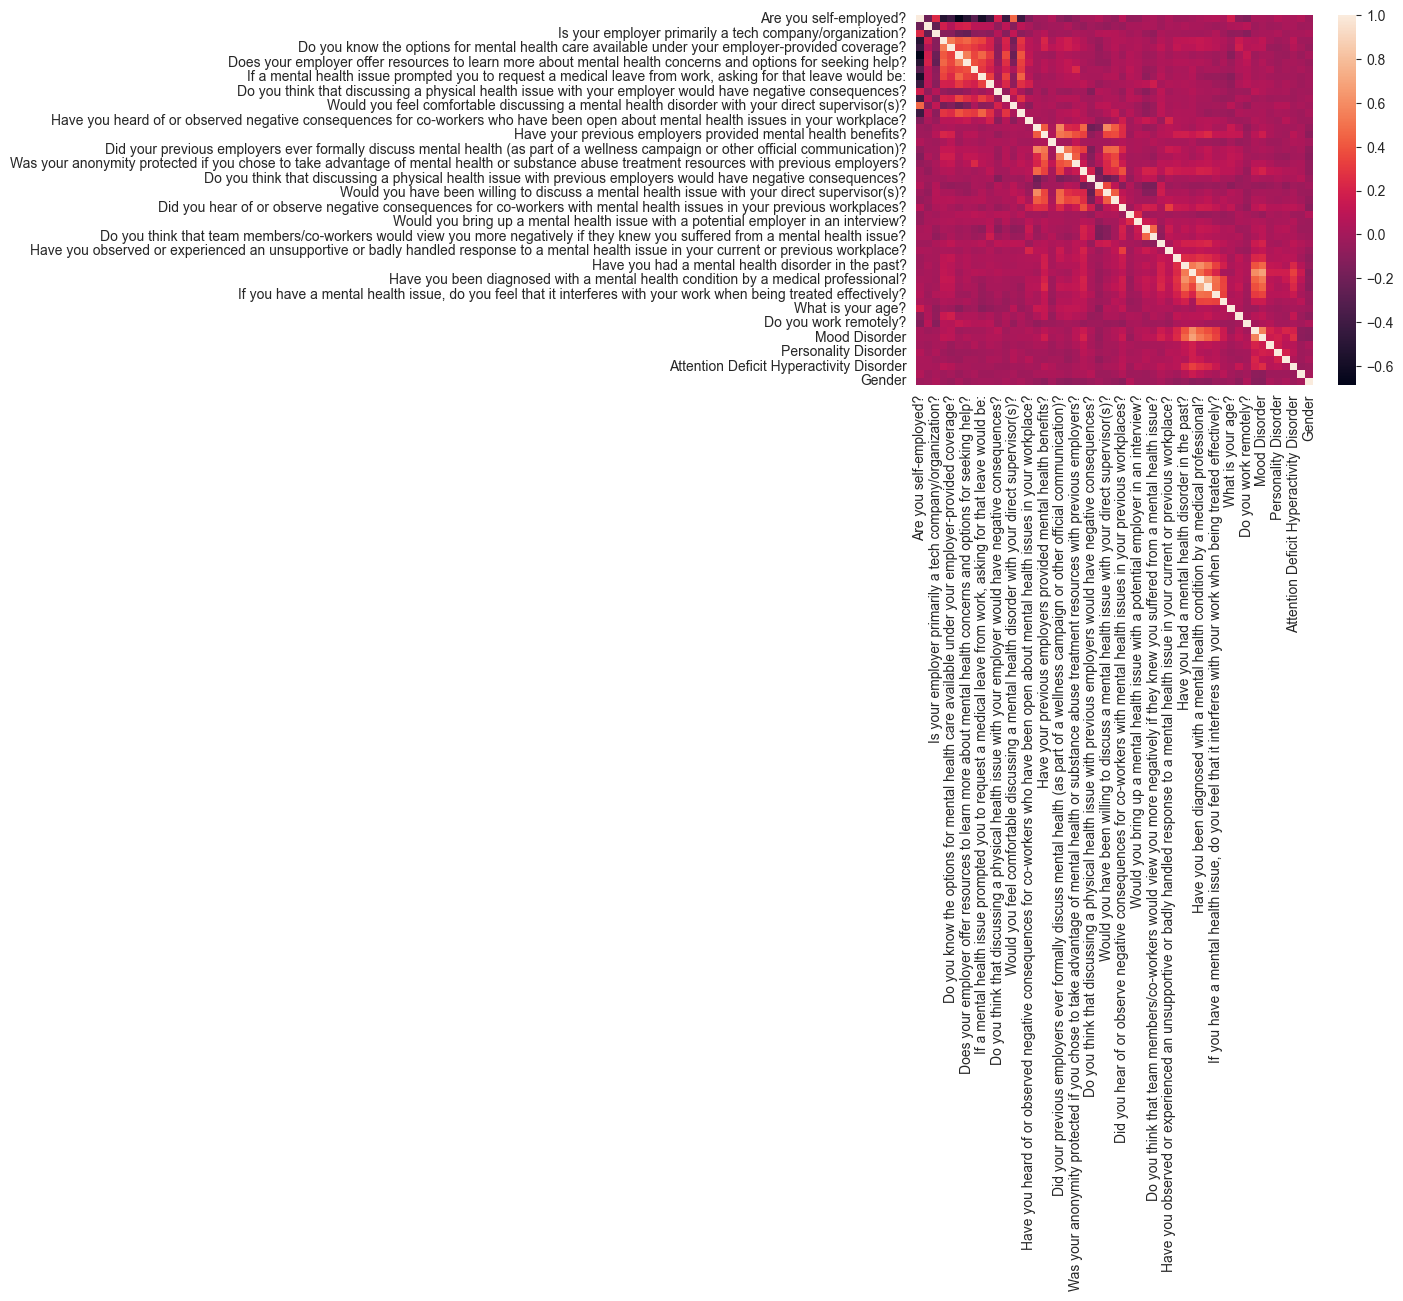

In [24]:
# Feature selection
# Correlation matrix
corr = data.corr()
sns.heatmap(corr)

# Create table of correlation values
correlation = corr.unstack().sort_values(ascending=False)
correlation = correlation[correlation != 1]

# Show columns with correlation > 0.7
high_corr = correlation[correlation > 0.7]
print(high_corr)


In [25]:
# Variance within features
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.2)
X = selector.fit_transform(data)
# Show variance per feature
variance = selector.variances_
columns = data.columns
variance_df = pd.DataFrame({'Feature': columns, 'Variance': variance})
variance_df = variance_df.sort_values(by='Variance', ascending=False)
print(variance_df)

data = pd.DataFrame(X, columns=columns[selector.get_support()])


                                              Feature   Variance
40                                  What is your age?  65.317627
8   If a mental health issue prompted you to reque...   3.243612
41                       What country do you live in?   2.695326
31  How willing would you be to share with friends...   2.311864
29  Do you feel that being identified as a person ...   2.282557
1   How many employees does your company or organi...   2.195919
38  If you have a mental health issue, do you feel...   1.944683
3   Does your employer provide mental health benef...   1.821538
30  Do you think that team members/co-workers woul...   1.761241
39  If you have a mental health issue, do you feel...   1.369797
21  Do you think that discussing a mental health d...   1.225909
32  Have you observed or experienced an unsupporti...   1.124094
16  Have your previous employers provided mental h...   1.094430
20  Was your anonymity protected if you chose to t...   1.093947
17  Were you aware of the

In [26]:
# Split data into target and features
target_columns = ['Do you currently have a mental health disorder?']
target = data[target_columns]
features = data.drop(target_columns, axis=1)


Mood Disorder 1082.0734740708713
Have you been diagnosed with a mental health condition by a medical professional? 549.9365874462221
Have you had a mental health disorder in the past? 335.60688469566526
Have you ever sought treatment for a mental health issue from a mental health professional? 333.2805076012612
If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively? 204.52847425274103
If you have a mental health issue, do you feel that it interferes with your work when being treated effectively? 181.0077720501004
Do you have a family history of mental illness? 51.18977448901391
How willing would you be to share with friends and family that you have a mental illness? 40.80623017233548
Do you think that discussing a mental health disorder with previous employers would have negative consequences? 32.12595277606608
Have your previous employers provided mental health benefits? 22.83047588506809
Did you hear of or observe negative 

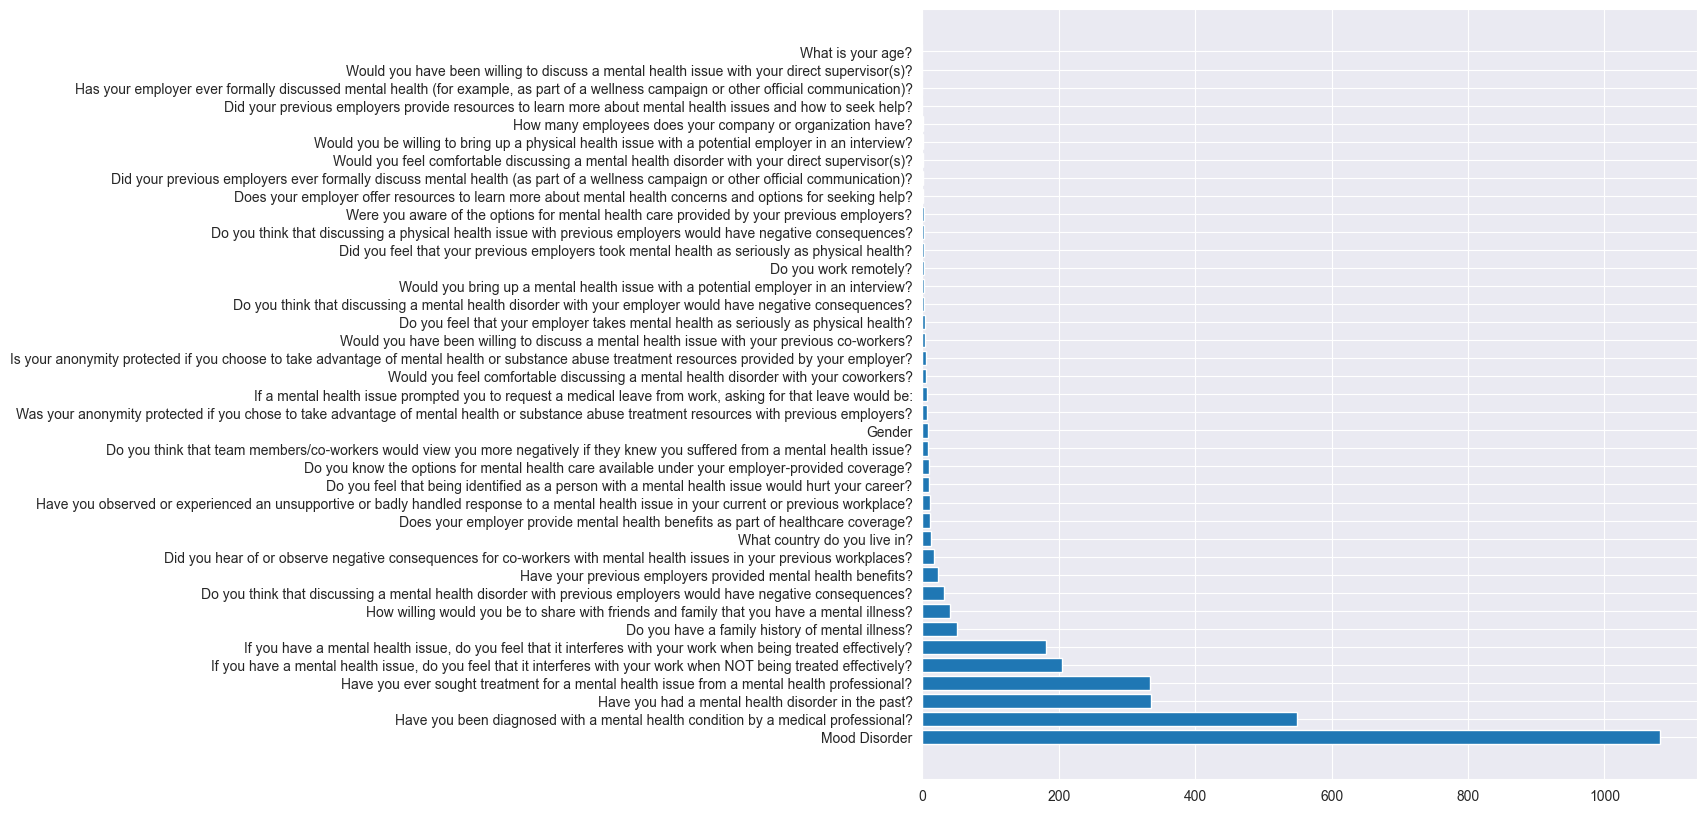

In [27]:
# ANOVA
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(score_func=f_classif, k=15)
selector.fit(features, target['Do you currently have a mental health disorder?'])

# Get scores
scores = selector.scores_
# Get column names
columns = features.columns

# Create dataframe
scores_df = pd.DataFrame({'Feature': columns, 'Score': scores})
scores_df = scores_df.sort_values(by='Score', ascending=False)
# print full column name and score
for index, row in scores_df.iterrows():
    print(row['Feature'], row['Score'])
    
# Plot scores
plt.figure(figsize=(10, 10))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.show()

features_anova = features.columns[selector.get_support()]



In [28]:
# Recursive feature elimination
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


estimator = LogisticRegression(random_state=42)
selector_rfe = RFE(estimator=estimator, n_features_to_select=15)
selector_rfe.fit(features_scaled, target['Do you currently have a mental health disorder?'])

# Show selected features
rfe_data = pd.DataFrame({'Feature': features.columns, 'Selected': selector_rfe.support_, 'Ranking': selector_rfe.ranking_}).sort_values(by='Ranking')
print(rfe_data)

# RFE cross validation
from sklearn.feature_selection import RFECV

selector_cv = RFECV(estimator=estimator, step=1, cv=5, min_features_to_select=10)
selector_cv.fit(features_scaled, target['Do you currently have a mental health disorder?'])
# Number of features
print("Selected Features",selector_cv.n_features_)
# Show selected features
rfe_data_cv = pd.DataFrame({'Feature': features.columns, 'Selected': selector_cv.support_, 'Ranking': selector_cv.ranking_}).sort_values(by='Ranking')
print(rfe_data_cv)

# Create list of selected features
features_rfecv = features.columns[selector_cv.support_]
print(features_rfecv)

                                              Feature  Selected  Ranking
12  Were you aware of the options for mental healt...      True        1
29  Have you had a mental health disorder in the p...      True        1
37                                      Mood Disorder      True        1
18  Would you have been willing to discuss a menta...      True        1
30  Have you been diagnosed with a mental health c...      True        1
31  Have you ever sought treatment for a mental he...      True        1
32  If you have a mental health issue, do you feel...      True        1
33  If you have a mental health issue, do you feel...      True        1
26  How willing would you be to share with friends...      True        1
7   Do you think that discussing a mental health d...      True        1
5   Is your anonymity protected if you choose to t...      True        1
3   Has your employer ever formally discussed ment...      True        1
34                                  What is your ag

Mood Disorder 614.7756521739084
Have you been diagnosed with a mental health condition by a medical professional? 311.71881429645293
If you have a mental health issue, do you feel that it interferes with your work when being treated effectively? 257.8227129528874
If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively? 198.49570882533268
Have you had a mental health disorder in the past? 193.87492218111714
Have you ever sought treatment for a mental health issue from a mental health professional? 188.85080861433858
How willing would you be to share with friends and family that you have a mental illness? 54.31512179817805
Do you think that discussing a mental health disorder with previous employers would have negative consequences? 53.56071712108455
Do you have a family history of mental illness? 43.79106325581857
Have your previous employers provided mental health benefits? 40.477678022111135
Does your employer provide mental 

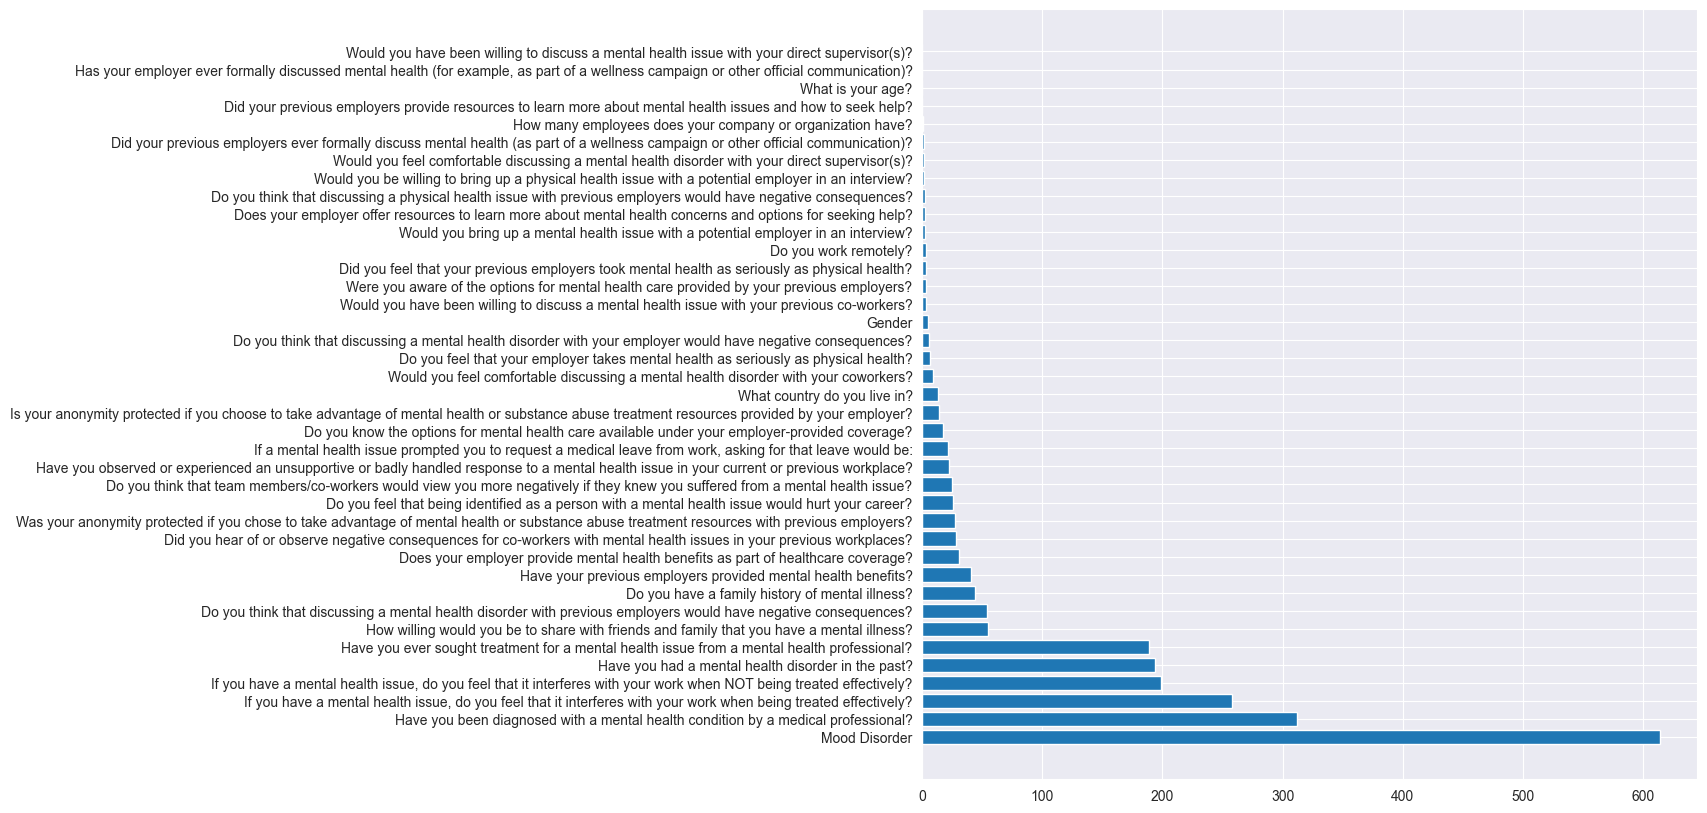

Index(['Does your employer provide mental health benefits as part of healthcare coverage?',
       'Have your previous employers provided mental health benefits?',
       'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
       'Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
       'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?',
       'Do you feel that being identified as a person with a mental health issue would hurt your career?',
       'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?',
       'How willing would you be to share with friends and family that you have a mental illness?',
       'Do you have a family history of mental illness?',
       'Have you had a mental he

In [29]:
# Chi squared test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Create and fit feature selector
selector = SelectKBest(score_func=chi2, k=15)
selector.fit(features, target['Do you currently have a mental health disorder?'])

# Get scores
scores = selector.scores_
# Get column names
columns = features.columns

# Create dataframe
scores_df = pd.DataFrame({'Feature': columns, 'Score': scores})
scores_df = scores_df.sort_values(by='Score', ascending=False)
# print full column name and score
for index, row in scores_df.iterrows():
    print(row['Feature'], row['Score'])
    
# Plot scores
plt.figure(figsize=(10, 10))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.show()

# Save features 
features_chi2 = features.columns[selector.get_support()]
print(features_chi2)




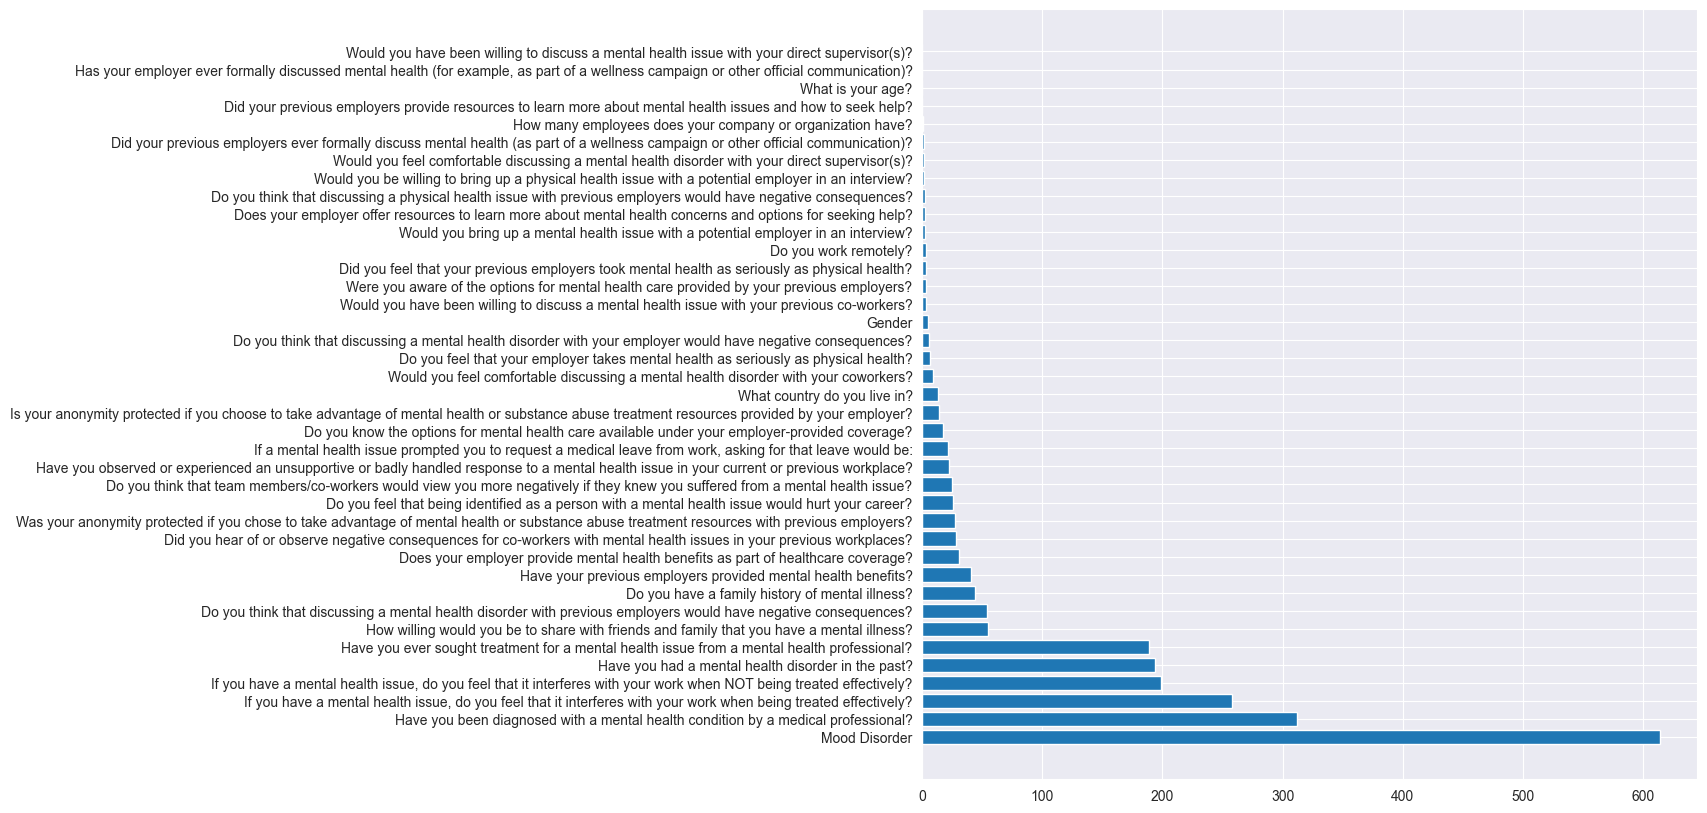

In [30]:
# Plot scores
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.show()

Mood Disorder 0.35782080618939704
Have you had a mental health disorder in the past? 0.3143360151135268
If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively? 0.31017608361737836
Have you been diagnosed with a mental health condition by a medical professional? 0.24259413598948787
If you have a mental health issue, do you feel that it interferes with your work when being treated effectively? 0.22241039168562438
Have you ever sought treatment for a mental health issue from a mental health professional? 0.15398714557687598
Do you have a family history of mental illness? 0.06491951867086021
How willing would you be to share with friends and family that you have a mental illness? 0.06477569838320796
Do you think that discussing a mental health disorder with previous employers would have negative consequences? 0.04542339539335627
Would you have been willing to discuss a mental health issue with your previous co-workers? 0.03802532

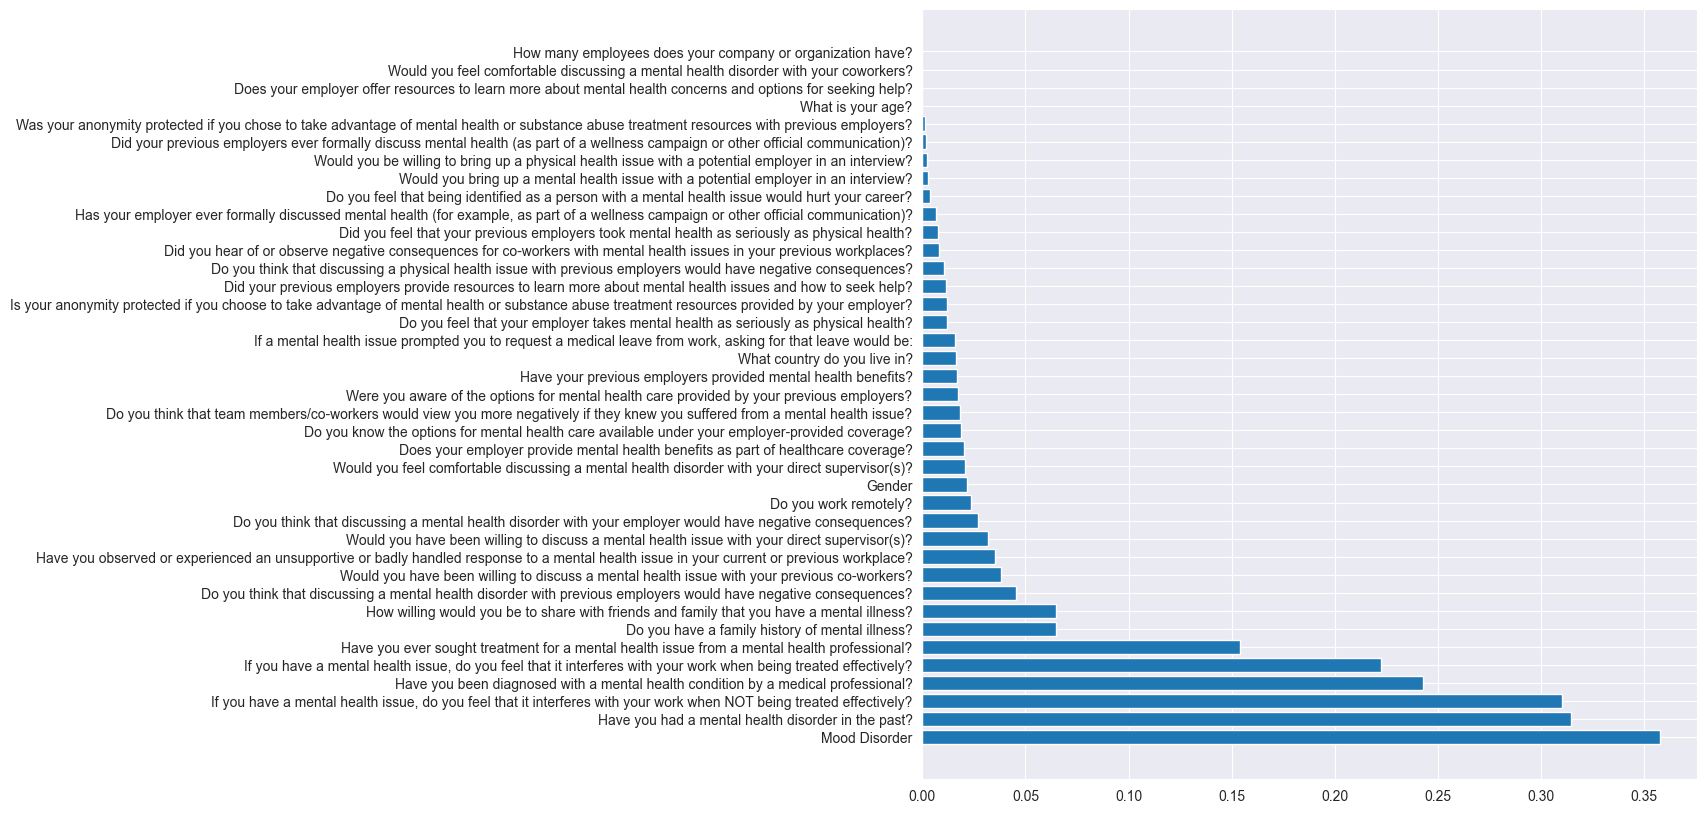

Index(['Do you think that discussing a mental health disorder with your employer would have negative consequences?',
       'Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
       'Would you have been willing to discuss a mental health issue with your previous co-workers?',
       'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
       'How willing would you be to share with friends and family that you have a mental illness?',
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
       'Do you have a family history of mental illness?',
       'Have you had a mental health disorder in the past?',
       'Have you been diagnosed with a mental health condition by a medical professional?',
       'Have you ever sought treatment for a mental health issue from a mental health profession

In [31]:
# Mutual information
from sklearn.feature_selection import mutual_info_classif

selector_mi = SelectKBest(score_func=mutual_info_classif, k=15)
selector_mi.fit(features, target['Do you currently have a mental health disorder?'])

# Get scores
scores_mi = selector_mi.scores_
# display scores
scores_df_mi = pd.DataFrame({'Feature': columns, 'Score': scores_mi}).sort_values(by='Score', ascending=False)
scores_df_mi = scores_df_mi.sort_values(by='Score', ascending=False)
for index, row in scores_df_mi.iterrows():
    print(row['Feature'], row['Score'])
    
    
# Plot scores
plt.figure(figsize=(10, 10))
plt.barh(scores_df_mi['Feature'], scores_df_mi['Score'])
plt.show()

# Save features
features_mi = features.columns[selector_mi.get_support()]
print(features_mi)
    


                                              Feature  Count
37                                      Mood Disorder      4
26  How willing would you be to share with friends...      4
33  If you have a mental health issue, do you feel...      4
32  If you have a mental health issue, do you feel...      4
31  Have you ever sought treatment for a mental he...      4
30  Have you been diagnosed with a mental health c...      4
29  Have you had a mental health disorder in the p...      4
28    Do you have a family history of mental illness?      4
21  Did you hear of or observe negative consequenc...      3
27  Have you observed or experienced an unsupporti...      3
16  Do you think that discussing a mental health d...      3
1   Does your employer provide mental health benef...      2
18  Would you have been willing to discuss a menta...      2
15  Was your anonymity protected if you chose to t...      2
38                                             Gender      2
24  Do you feel that bei

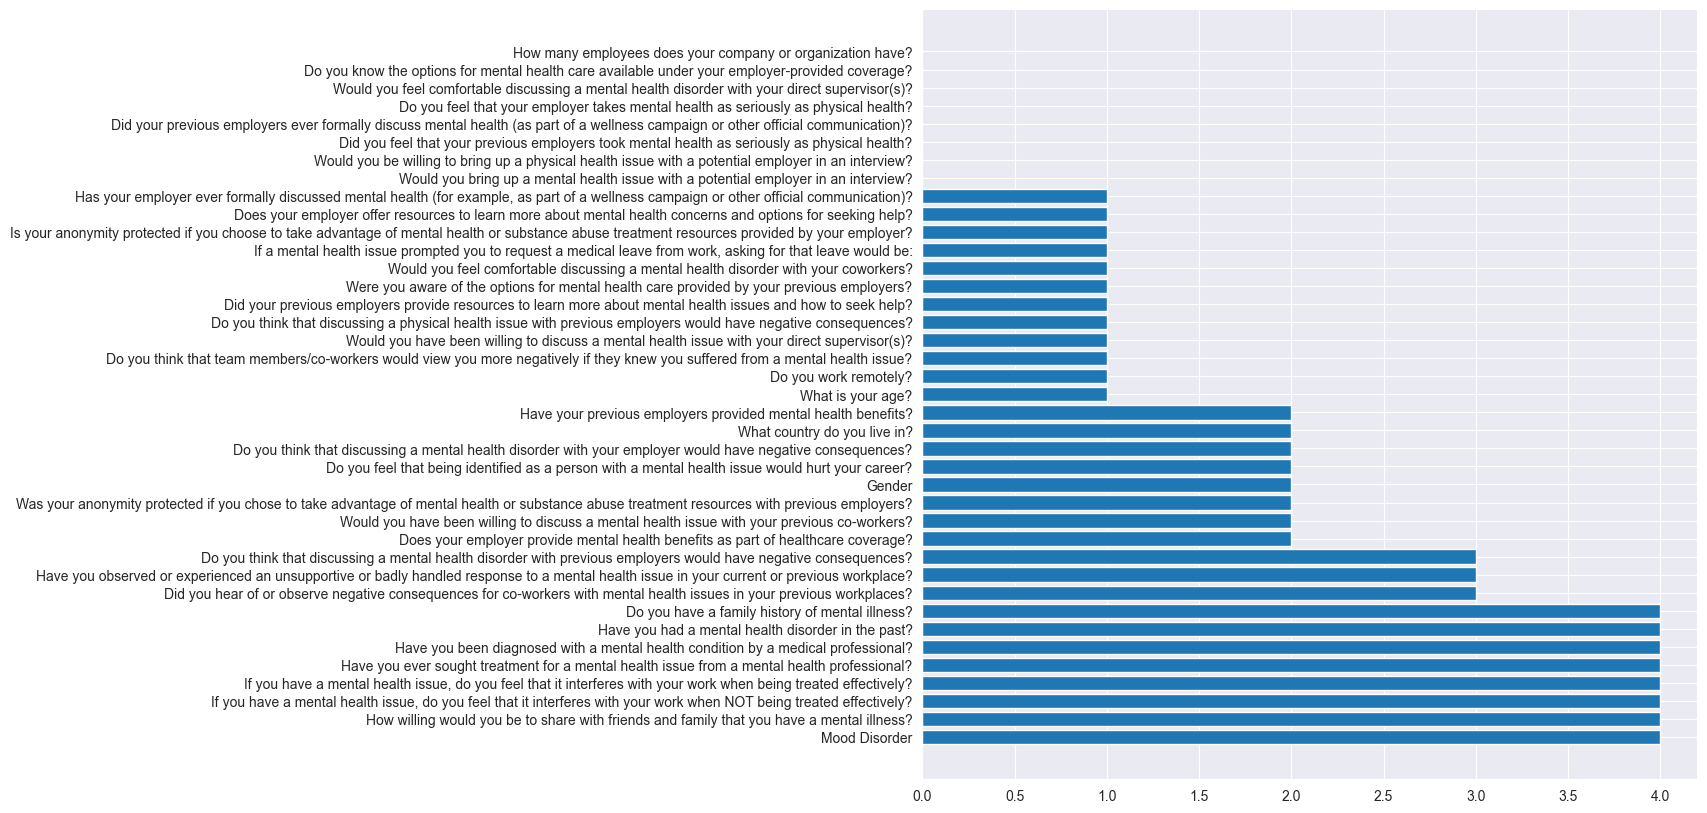

(11, 2)


In [32]:
# Compare output of different feature selection methods by summing the number of times a feature is selected

# Create dictionary to store feature selection results
feature_dict = {}
# Add features to dictionary
for feature in features.columns:
    feature_dict[feature] = 0
    
# Add features to dictionary
for feature in features_anova:
    feature_dict[feature] += 1
    
for feature in features_rfecv:
    feature_dict[feature] += 1
    
for feature in features_chi2:
    feature_dict[feature] += 1
    
for feature in features_mi:
    feature_dict[feature] += 1
    
# Create dataframe
feature_df = pd.DataFrame({'Feature': list(feature_dict.keys()), 'Count': list(feature_dict.values())})
feature_df = feature_df.sort_values(by='Count', ascending=False)
print(feature_df)

# Plot
plt.figure(figsize=(10, 10))
plt.barh(feature_df['Feature'], feature_df['Count'])
plt.show()
# amount of features with at leats 2 selection
print(feature_df[feature_df['Count'] > 2].shape)

selected_15 = feature_df[feature_df['Count'] > 2]['Feature']


In [33]:
# Select features
features_selected = features[selected_15]

In [34]:
# Scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_selected)

In [35]:
# PCA
from sklearn.decomposition import PCA

covariance = np.cov(features_scaled.T)

eigenvalues, eigenvectors = np.linalg.eig(covariance)

# Sum of eigenvalues
total = sum(eigenvalues)
print(total)

# Sort eigenvalues
exp_var = sorted(eigenvalues, reverse=True)

# Calculate explained variance
exp_var = exp_var/ total *100
print(exp_var)
# Cumulative explained variance
cumulative = np.cumsum(exp_var)
print(cumulative)

11.007681564245809
[32.51453538 13.18742097  8.92715939  8.03942612  7.66693423  7.20668814
  5.65790539  5.42805541  4.92463324  4.18235007  2.26489167]
[ 32.51453538  45.70195635  54.62911574  62.66854186  70.33547608
  77.54216422  83.20006961  88.62812502  93.55275826  97.73510833
 100.        ]


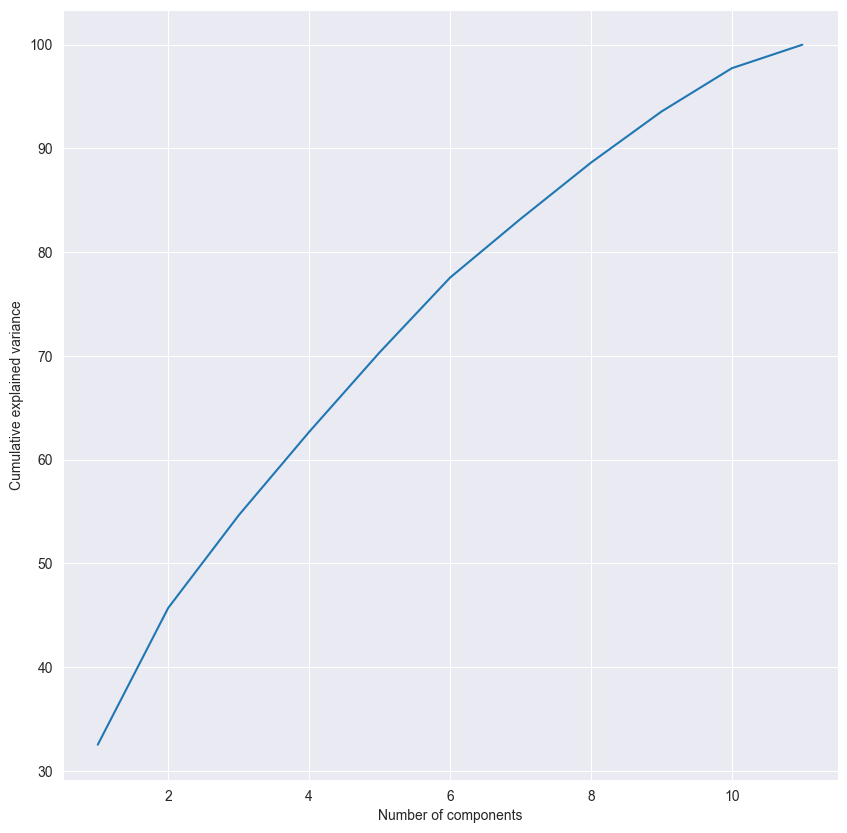

In [36]:
# Plot explained variance
plt.figure(figsize=(10, 10))
plt.plot(range(1, len(exp_var)+1), cumulative)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [37]:
# Select components that explain 70-80% of variance
pca = PCA(n_components=6)
features_pca = pca.fit_transform(features_scaled)

# Create dataframe
pca_df = pd.DataFrame(features_pca)
features_scaled = pca_df

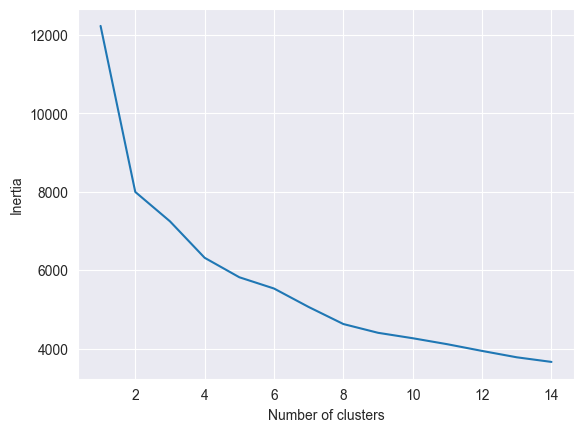

In [38]:
# Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create and fit kmeans model
inertia = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    
# Plot inertia
plt.plot(range(1, 15), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



In [39]:
# Optimal clusters with n 2-4 -> 3
n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20)
kmeans.fit(features_scaled)

# Add cluster to data
cluster = pd.DataFrame(features_scaled, columns=features_selected.columns)
cluster['Label'] = kmeans.labels_

#Validate clusters
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(features_scaled, kmeans.labels_)
print(silhouette)
# distribution of clusters
print(cluster['Label'].value_counts())


0.3162002527072245
Label
1    750
0    683
Name: count, dtype: int64


0.3162002527072245


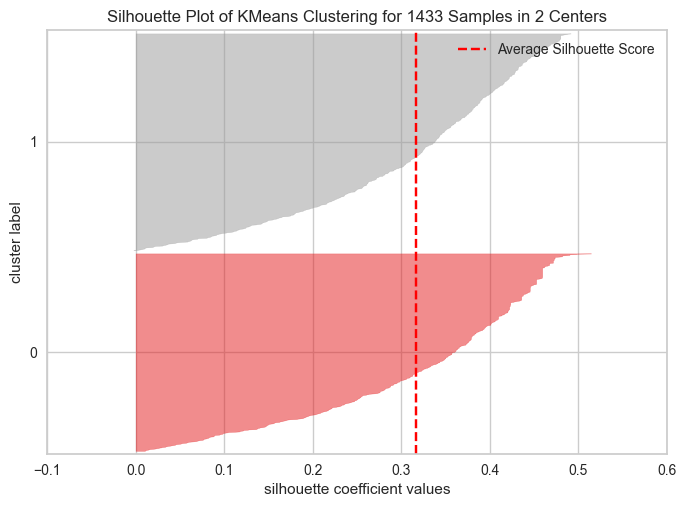

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1433 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
# Silhouette score
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(features_scaled, kmeans.labels_)
print(silhouette)

# Silhouette vizualization
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(features_scaled)
visualizer.show()

                           Are you self-employed?  \
Cluster                                             
Mental Health Disorder                          0   
No Mental Health Disorder                       0   

                          How many employees does your company or organization have?  \
Cluster                                                                                
Mental Health Disorder                                                26-100           
No Mental Health Disorder                                             26-100           

                           Is your employer primarily a tech company/organization?  \
Cluster                                                                              
Mental Health Disorder                                                   1.0         
No Mental Health Disorder                                                1.0         

                          Does your employer provide mental health benefits as part of he

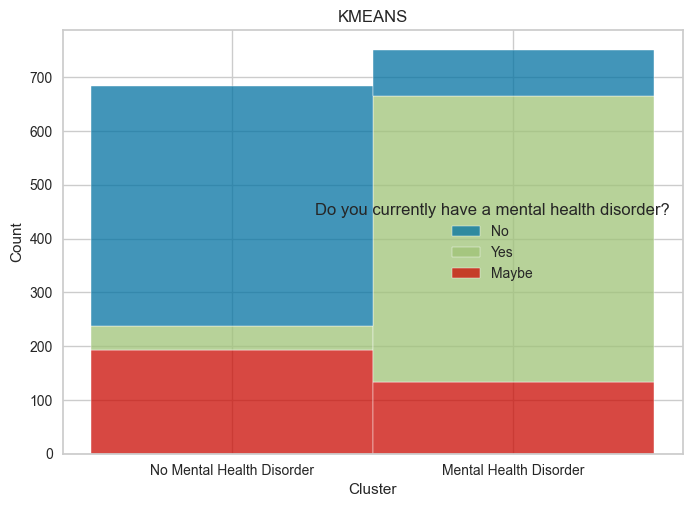

In [41]:
# Transfer clusters to original data
data_km = pd.read_csv('cleaned_data.csv')
data_km['Cluster'] = cluster['Label']

#  Rename
data_km['Cluster'] = data_km['Cluster'].apply(lambda x: 'Mental Health Disorder' if x == 1 else 'No Mental Health Disorder')

# Create table of cluster modes
cluster_modes_km = data_km.groupby('Cluster').agg(lambda x: x.value_counts().index[0])
# Change print settings
pd.set_option('display.max_columns', None)
print(cluster_modes_km)

# Value count per column of : Do you currently have a mental health disorder?
print(data_km.groupby('Cluster')['Do you currently have a mental health disorder?'].value_counts())
# Plot distribution of mental health disorder per cluster
sns.histplot(data_km, x='Cluster', hue='Do you currently have a mental health disorder?', multiple="stack")
plt.title("KMEANS")
plt.show()





In [42]:
# GMM
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(features_scaled)

# GMM
cluster_gmm = pd.DataFrame(features_scaled, columns=features_selected.columns)
cluster_gmm['Label'] = gmm.predict(features_scaled)


In [43]:
# Silhouette score
silhouette_gmm = silhouette_score(features_scaled, gmm.predict(features_scaled))
print(silhouette_gmm)

# Silhouette vizualization

0.2259084847212787


                           Are you self-employed?  \
Cluster                                             
Mental Health Disorder                          0   
No Mental Health Disorder                       0   

                          How many employees does your company or organization have?  \
Cluster                                                                                
Mental Health Disorder                                                26-100           
No Mental Health Disorder                                             26-100           

                           Is your employer primarily a tech company/organization?  \
Cluster                                                                              
Mental Health Disorder                                                   1.0         
No Mental Health Disorder                                                1.0         

                          Does your employer provide mental health benefits as part of he

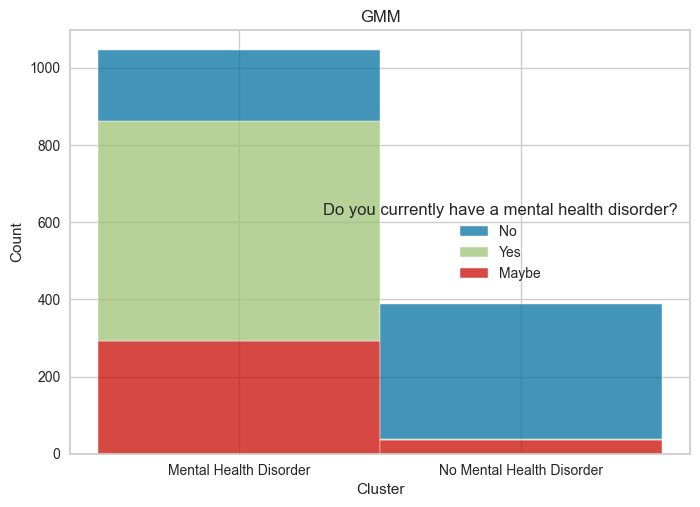

In [44]:
# Transfer clusters to original data
data_gmm = pd.read_csv('cleaned_data.csv')
data_gmm['Cluster'] = cluster_gmm['Label']

# Rename
data_gmm['Cluster'] = data_gmm['Cluster'].apply(lambda x: 'Mental Health Disorder' if x == 0 else 'No Mental Health Disorder')

# Create table of cluster modes
cluster_modes_gmm = data_gmm.groupby('Cluster').agg(lambda x: x.value_counts().index[0])

print(cluster_modes_gmm)

# Value count per column of : Do you currently have a mental health disorder?
print(data_gmm.groupby('Cluster')['Do you currently have a mental health disorder?'].value_counts())
# Plot distribution of mental health disorder per cluster
sns.histplot(data_gmm, x='Cluster', hue='Do you currently have a mental health disorder?', multiple="stack")
plt.title("GMM")
plt.show()


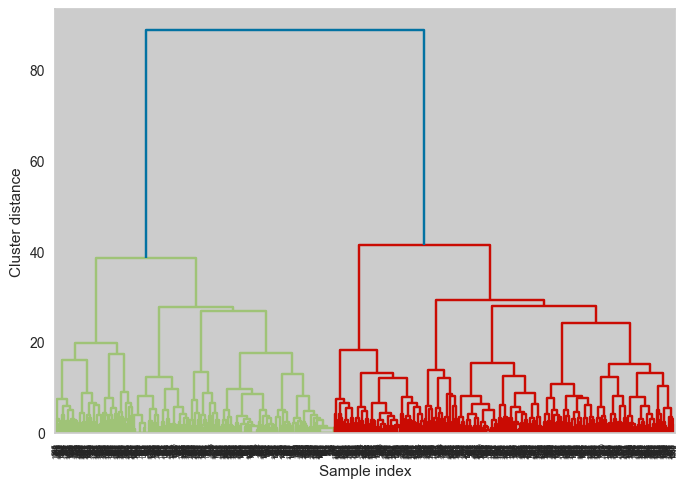

In [45]:
# Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(features_scaled)
dendrogram(linkage_array)
ax = plt.gca()


plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

In [46]:
# Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering


agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg.fit(features_scaled)

# Add cluster to data
cluster_agg = pd.DataFrame(features_scaled, columns=features_selected.columns)
cluster_agg['Label'] = agg.labels_


In [47]:
# Silhouette score
silhouette_agg = silhouette_score(features_scaled, agg.labels_)
print(silhouette_agg)


0.29746299425470185


                           Are you self-employed?  \
Cluster                                             
Mental Health Disorder                          0   
No Mental Health Disorder                       0   

                          How many employees does your company or organization have?  \
Cluster                                                                                
Mental Health Disorder                                                26-100           
No Mental Health Disorder                                             26-100           

                           Is your employer primarily a tech company/organization?  \
Cluster                                                                              
Mental Health Disorder                                                   1.0         
No Mental Health Disorder                                                1.0         

                          Does your employer provide mental health benefits as part of he

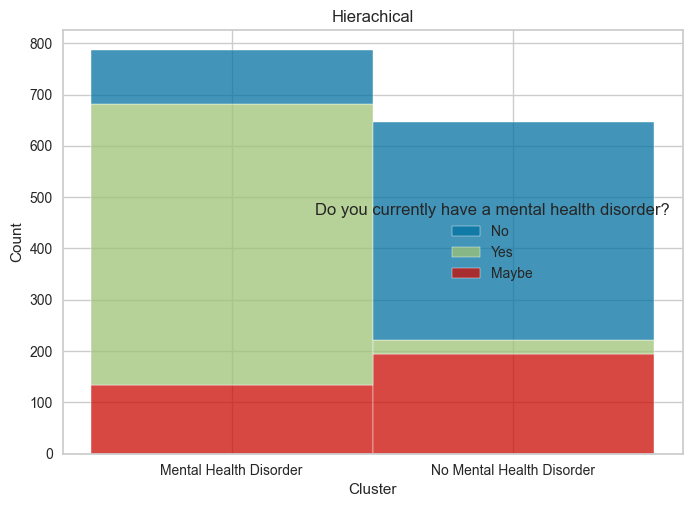

In [48]:
# Transfer clusters to original data
data_agg = pd.read_csv('cleaned_data.csv')
data_agg['Cluster'] = cluster_agg['Label']

# Rename
data_agg['Cluster'] = data_agg['Cluster'].apply(lambda x: 'Mental Health Disorder' if x == 0 else 'No Mental Health Disorder')

# Create table of cluster modes
cluster_modes_agg = data_agg.groupby('Cluster').agg(lambda x: x.value_counts().index[0])

print(cluster_modes_agg)

# Value count per column of : Do you currently have a mental health disorder?
print(data_agg.groupby('Cluster')['Do you currently have a mental health disorder?'].value_counts())
# Plot distribution of mental health disorder per cluster
sns.histplot(data_agg, x='Cluster', hue='Do you currently have a mental health disorder?', multiple="stack")
plt.title("Hierachical")
plt.show()

In [49]:
# Choosing the best clustering method
# Silhouette score
print("KMeans", silhouette)
print("GMM", silhouette_gmm)
print("Agg", silhouette_agg)

# Kmeans has the highest silhouette score


KMeans 0.3162002527072245
GMM 0.2259084847212787
Agg 0.29746299425470185


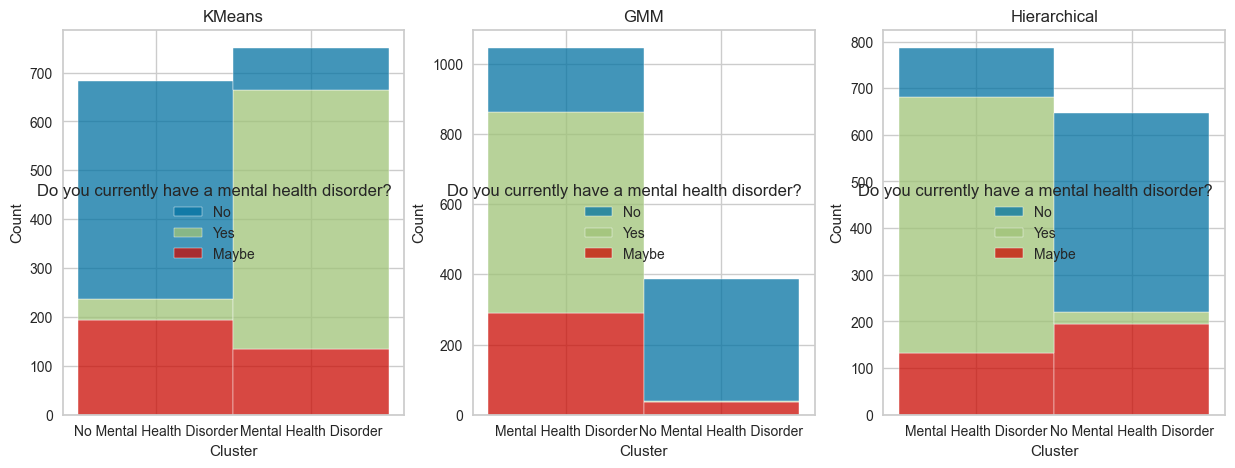

In [50]:
# Create 1 plot that shows all 3 cluster "Do you have metal health disorder" 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data_km, x='Cluster', hue='Do you currently have a mental health disorder?', multiple="stack", ax=axs[0])
axs[0].set_title('KMeans')

sns.histplot(data_gmm, x='Cluster', hue='Do you currently have a mental health disorder?', multiple="stack", ax=axs[1])
axs[1].set_title('GMM')

sns.histplot(data_agg, x='Cluster', hue='Do you currently have a mental health disorder?', multiple="stack", ax=axs[2])
axs[2].set_title('Hierarchical')

plt.show()


In [51]:
print(selected_15)

37                                        Mood Disorder
26    How willing would you be to share with friends...
33    If you have a mental health issue, do you feel...
32    If you have a mental health issue, do you feel...
31    Have you ever sought treatment for a mental he...
30    Have you been diagnosed with a mental health c...
29    Have you had a mental health disorder in the p...
28      Do you have a family history of mental illness?
21    Did you hear of or observe negative consequenc...
27    Have you observed or experienced an unsupporti...
16    Do you think that discussing a mental health d...
Name: Feature, dtype: object


In [52]:
# Vizualizing KMEANS cluster
# Rename clusters
# Show features with different modes per cluster of KMM

different = []
for column in cluster_modes_km.columns:
    if len(cluster_modes_km[column].unique()) > 1:
        different.append(column)
        
# Show dataframe of only different columns
print(cluster_modes_km[different])

                          Does your employer provide mental health benefits as part of healthcare coverage?  \
Cluster                                                                                                       
Mental Health Disorder                                                   Yes                                  
No Mental Health Disorder                                       I don't know                                  

                          Have your previous employers provided mental health benefits?  \
Cluster                                                                                   
Mental Health Disorder                                              Some did              
No Mental Health Disorder                                       I don't know              

                          Do you think that discussing a mental health disorder with previous employers would have negative consequences?  \
Cluster                                          

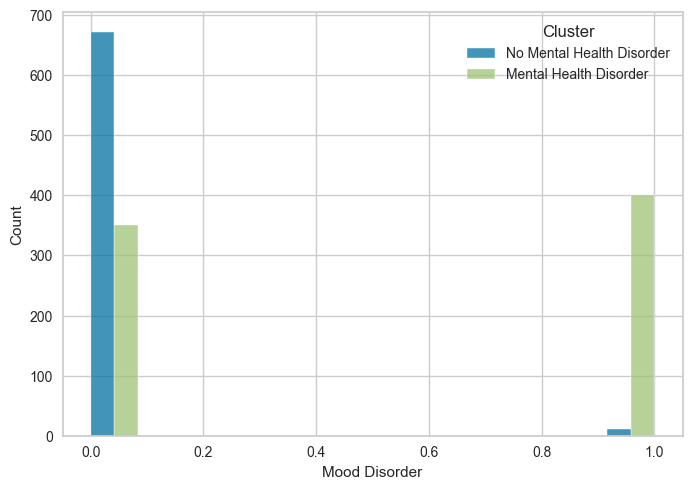

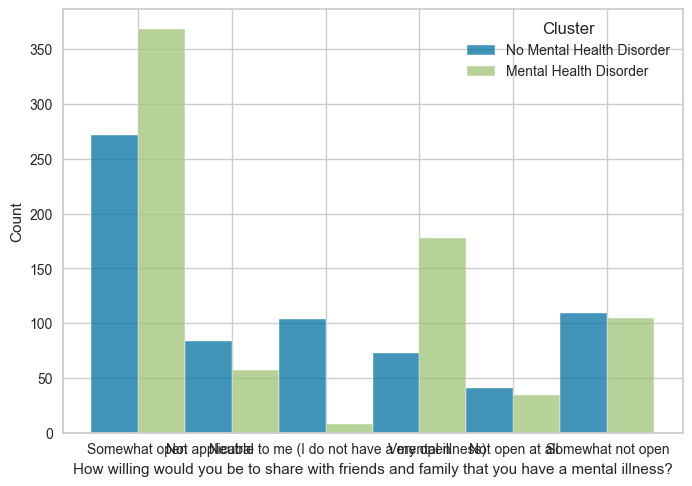

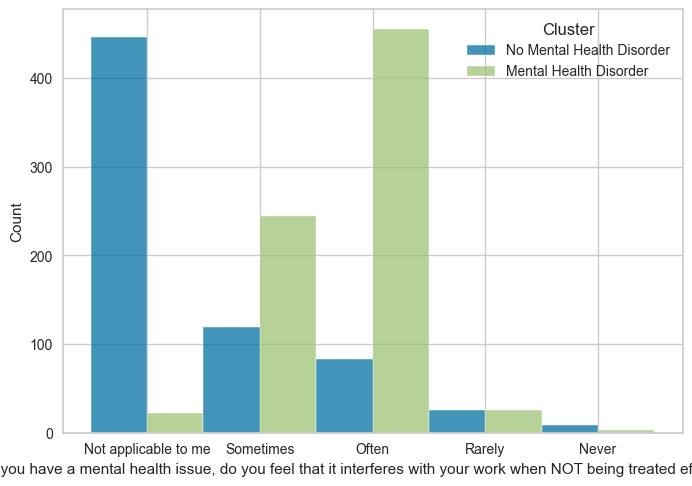

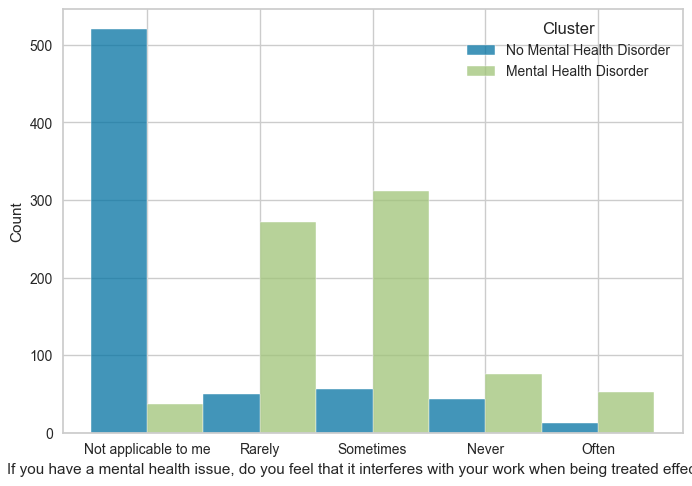

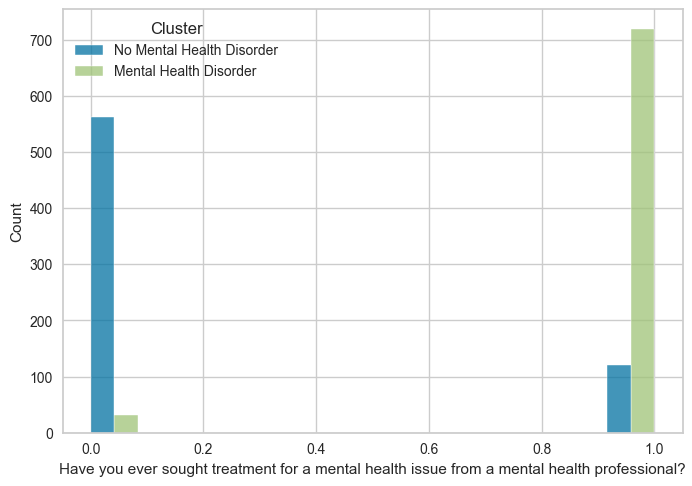

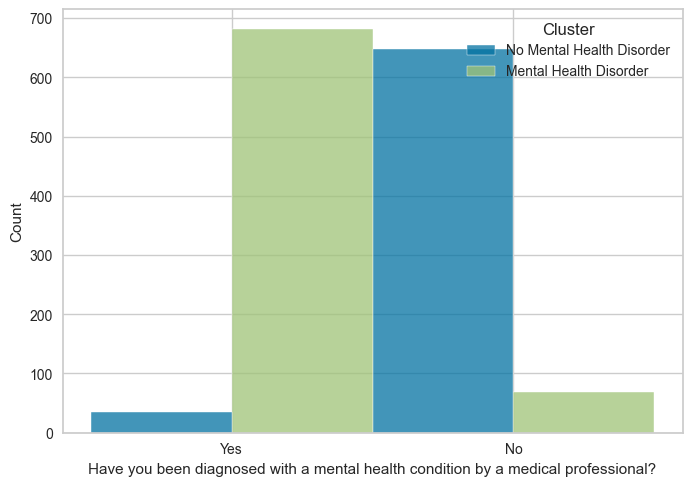

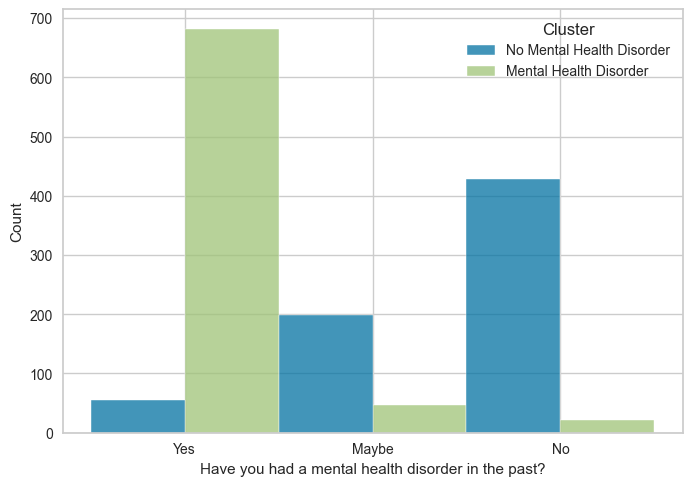

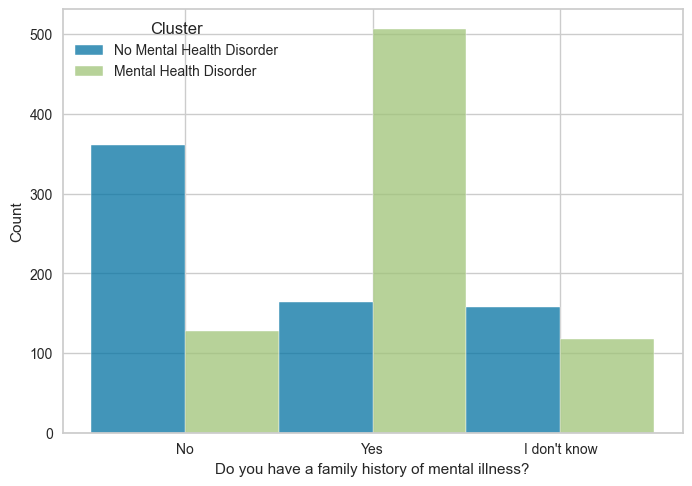

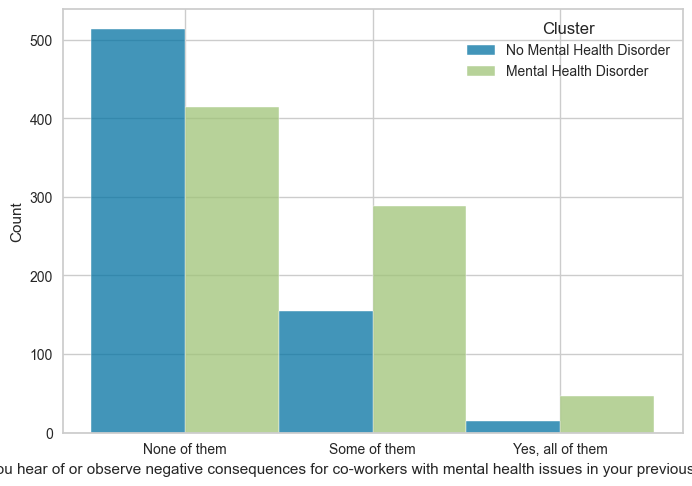

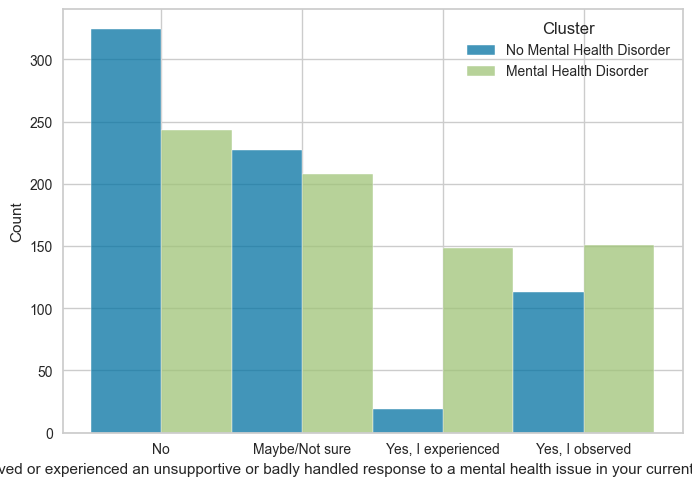

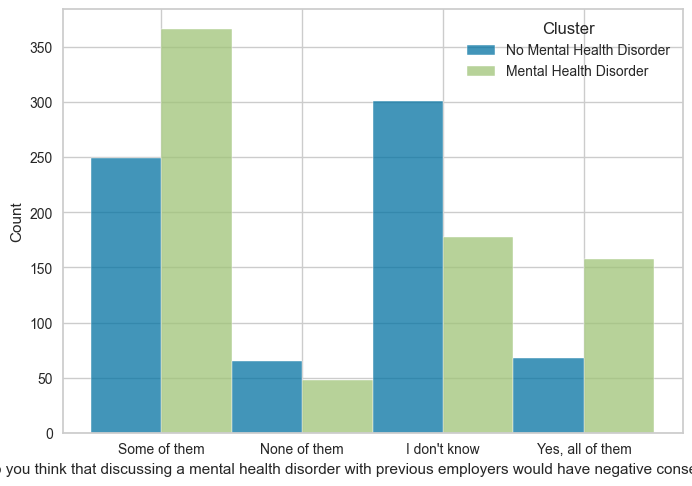

<Axes: xlabel='If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?', ylabel='Count'>

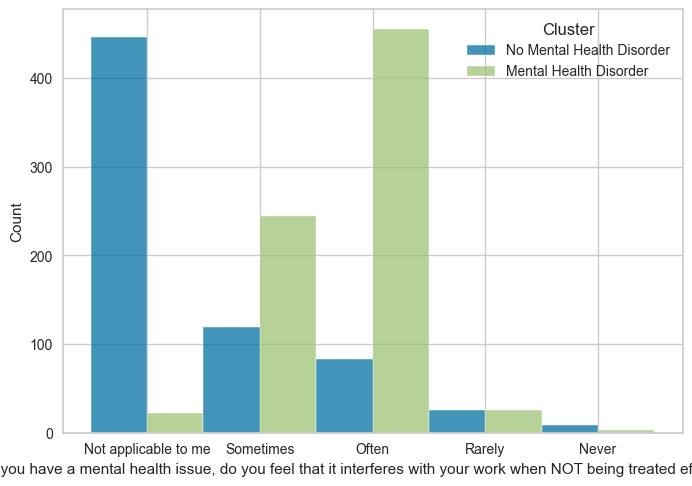

In [56]:
# Plot distribution of vslue count per feature selected by feature selection
for feature in selected_15:
    sns.histplot(data_km, x=feature, hue='Cluster', element="bars", multiple="dodge")
    plt.show()
    
sns.histplot(data_km, x='If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?', hue='Cluster', element="bars", multiple="dodge")